# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with [OpenAI Gym's BipedalWalker-v2 environment](https://gym.openai.com/envs/BipedalWalker-v2/).

Reward is given for moving forward, total 300+ points up to the far end. If the robot falls, it gets -100. Applying motor torque costs a small amount of points, more optimal agent will get better score. State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements. There's no coordinates in the state vector.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
from TD3_agent import TD3

import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('BipedalWalker-v3')
env.seed(10)
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

print('Action Size:', action_size)
print('Action High:', env.action_space.high)
print('Action Low:', env.action_space.low)
print('State Size:', state_size)
print('State High:', env.observation_space.high)
print('State Low:', env.observation_space.low)

Action Size: 4
Action High: [1. 1. 1. 1.]
Action Low: [-1. -1. -1. -1.]
State Size: 24
State High: [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]
State Low: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]


C:\Users\ad55a\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
agent = TD3(state_size=state_size, action_size=action_size, random_seed=10)

### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [4]:
from tqdm.notebook import tqdm

def td3(n_episodes=2000, max_t=300):
    
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    
    for i_episode in tqdm(range(1, n_episodes+1)):
        
        state = env.reset()
        agent.reset()
        score = 0
        
        for t in range(max_t):
            
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done, t)
            
            state = next_state
            score += reward
        
            if done:
                break
                
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_1.state_dict(), 'checkpoint_critic_1.pth')
            torch.save(agent.critic_2.state_dict(), 'checkpoint_critic_2.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

Episode 100	Average Score: -65.38	Score: -34.189
Episode 200	Average Score: -79.59	Score: -102.88
Episode 300	Average Score: -104.65	Score: -103.14
Episode 400	Average Score: -105.52	Score: -107.64
Episode 500	Average Score: -102.33	Score: -101.85
Episode 600	Average Score: -102.25	Score: -103.87
Episode 700	Average Score: -103.65	Score: -106.55
Episode 800	Average Score: -103.03	Score: -109.81
Episode 900	Average Score: -95.29	Score: -107.125
Episode 1000	Average Score: -113.63	Score: -118.39
Episode 1100	Average Score: -101.07	Score: -116.27
Episode 1200	Average Score: -88.21	Score: -109.564
Episode 1300	Average Score: -96.14	Score: -108.993
Episode 1400	Average Score: -102.29	Score: -105.96
Episode 1500	Average Score: -103.36	Score: -103.43
Episode 1600	Average Score: -104.08	Score: -112.76
Episode 1700	Average Score: -83.18	Score: -115.358
Episode 1800	Average Score: -87.12	Score: -32.5002
Episode 1900	Average Score: -78.37	Score: -108.75
Episode 2000	Average Score: -113.46	Score: 

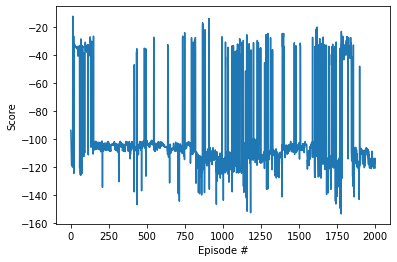

In [5]:
scores = td3()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [18]:
agent = TD3(state_size=state_size, action_size=action_size, random_seed=100)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_1.load_state_dict(torch.load('checkpoint_critic_1.pth'))
agent.critic_2.load_state_dict(torch.load('checkpoint_critic_2.pth'))

state = env.reset()
agent.reset()
score = []
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    score.append(reward)
    if done:
        break

print(np.sum(score))         
env.close()

-116.97208590885501
